# Visualization notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Implementations file for our differential privacy implementations
import implementations as imp
# Rappor file for Google rappor algorithm implementations
import rappor

## Compress, then apply LDP

In [2]:
# Sample probability of occurrence uniformly
probabilities=np.random.uniform(low=0, high=1, size=8)
# Make the sum equal to 1
probabilities/=probabilities.sum()
# Generate a database
db=imp.generateDB(1000, probabilities)
# Compress the database
symbols1,db_comp=imp.HuffmanCompression(db)
# Store the entropy values in a list
entropies=list()
# Store various epsilon values
epsilonLin=np.linspace(start=0,stop=1,num=100,endpoint=True)
entropies=[imp.ComputeEntropy(imp.LDP_compressed(db_comp,epsilon=epsilon)) for epsilon in epsilonLin]

In [3]:
# Print the database
db, db.sum()

(array([ 30, 168, 104,  25, 188, 174, 187, 124]), 1000)

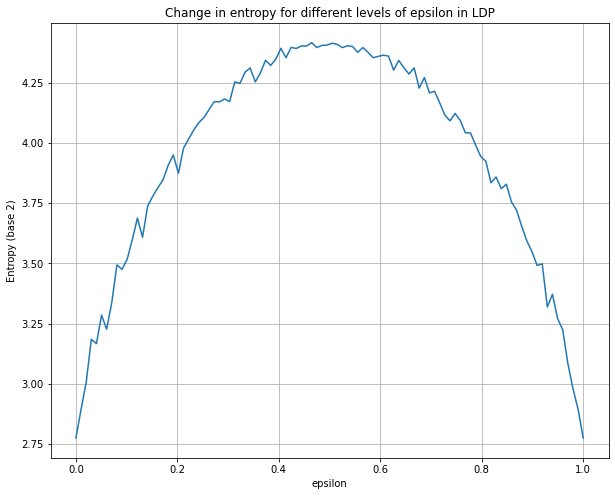

In [4]:
# Plot the epsilon vs. entropy curve
plt.figure(figsize=(10,8))
plt.title("Change in entropy for different levels of epsilon in LDP")
plt.xlabel("epsilon")
plt.ylabel("Entropy (base 2)")
plt.grid(True)
plt.plot(epsilonLin,entropies)

## Compressibility with and without DP

In [5]:
def GenerateDB(dist="uniform",param=0.5):
    if dist=="binomial":
        # Sample probability of occurrence in binomial distribution
        probabilities=np.random.binomial(n=8, p=param, size=8)
        # Make the sum equal to 1
        probabilities=np.array(probabilities)/np.array(probabilities).sum()
        # Generate a database
        db=imp.generateDB(10000, probabilities)
        return db
    elif dist=="poisson":
        # Sample probability of occurrence in poisson distribution
        probabilities=np.random.poisson(lam=param, size=8)
        # Make the sum equal to 1
        probabilities=np.array(probabilities)/np.array(probabilities).sum()
        # Generate a database
        db=imp.generateDB(10000, probabilities)
        return db
    elif dist=="geom":
        # Sample probability of occurrence in geometric distribution
        probabilities=np.random.geometric(p=param, size=8)
        # Make the sum equal to 1
        probabilities=np.array(probabilities)/np.array(probabilities).sum()
        # Generate a database
        db=imp.generateDB(10000, probabilities)
        return db
    elif dist=="exponential":
        # Sample probability of occurrence in exponential distribution
        probabilities=np.random.exponential(scale=param, size=8)
        # Make the sum equal to 1
        probabilities=np.array(probabilities)/np.array(probabilities).sum()
        # Generate a database
        db=imp.generateDB(10000, probabilities)
        return db
    elif dist!="uniform":
        raise NameError("Unknown distribution. Please try again.")
    # Sample probability of occurrence uniformly
    probabilities=np.random.uniform(low=0, high=1, size=8)
    # Make the sum equal to 1
    probabilities/=probabilities.sum()
    # Generate a database
    db=imp.generateDB(10000, probabilities)
    return db

In [6]:
# Epsilon values from 0 to 0.5
epsilonLin=np.linspace(start=0,stop=0.5,num=100,endpoint=True)

In [7]:
def CompressibilityLDP(db):    
    # Compress the database
    symbols1,db_comp=imp.HuffmanCompression(db)
    # Store various epsilon values
    # epsilonLin=np.linspace(start=0,stop=1,num=100,endpoint=True)
    # Store the average number of bits in a list
    keys=np.array([len(x) for x in db_comp.keys()])
    values=np.array(list(db_comp.values()))
    avgBits=(keys*values).sum()/values.sum()
    # For plotting the constant value
    numBitsAvg=[avgBits]*100

    # Store various epsilon values
    # epsilonLin=np.linspace(start=0,stop=1.0,num=100,endpoint=True)
    numBitsAvgLDP=list()
    # Now, apply LDP before compression
    for epsilon in epsilonLin:
        db_ldp=imp.LDP(D=db,R=[epsilon]*3)
        symbols1,db_comp=imp.HuffmanCompression(db_ldp)
        keys=np.array([len(x) for x in db_comp.keys()])
        values=np.array(list(db_comp.values()))
        numBitsAvgLDP.append((keys*values).sum()/values.sum())
        
    return numBitsAvg,numBitsAvgLDP

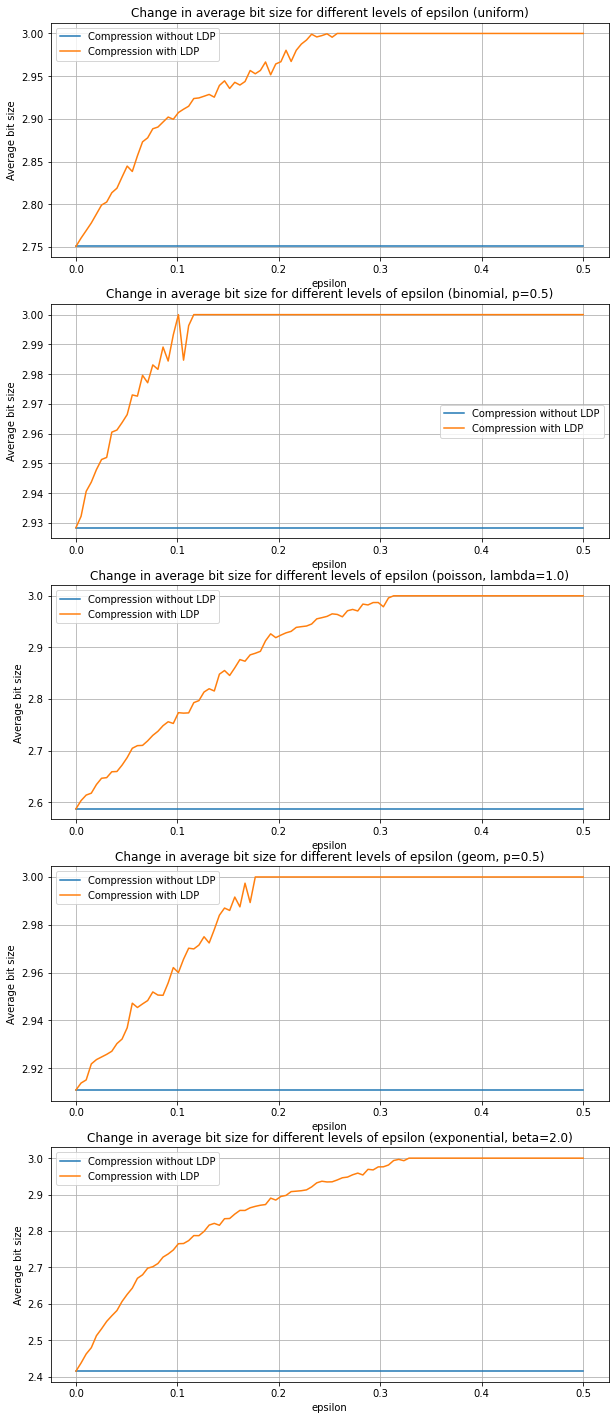

In [8]:
# Plot the epsilon vs. numBitsAvg curves
plt.figure(figsize=(10,25))
plt.subplot(511)
# Generate database
db=GenerateDB("uniform")
numBitsAvg,numBitsAvgLDP=CompressibilityLDP(db)
plt.title("Change in average bit size for different levels of epsilon (uniform)")
plt.xlabel("epsilon")
plt.ylabel("Average bit size")
plt.grid(True)
plt.plot(epsilonLin,numBitsAvg,label="Compression without LDP")
plt.plot(epsilonLin,numBitsAvgLDP,label="Compression with LDP")
plt.legend()
plt.subplot(512)
# Generate database
db=GenerateDB("binomial",param=0.5)
numBitsAvg,numBitsAvgLDP=CompressibilityLDP(db)
plt.title("Change in average bit size for different levels of epsilon (binomial, p=0.5)")
plt.xlabel("epsilon")
plt.ylabel("Average bit size")
plt.grid(True)
plt.plot(epsilonLin,numBitsAvg,label="Compression without LDP")
plt.plot(epsilonLin,numBitsAvgLDP,label="Compression with LDP")
plt.legend()
plt.subplot(513)
# Generate database
db=GenerateDB("poisson",param=1)
numBitsAvg,numBitsAvgLDP=CompressibilityLDP(db)
plt.title("Change in average bit size for different levels of epsilon (poisson, lambda=1.0)")
plt.xlabel("epsilon")
plt.ylabel("Average bit size")
plt.grid(True)
plt.plot(epsilonLin,numBitsAvg,label="Compression without LDP")
plt.plot(epsilonLin,numBitsAvgLDP,label="Compression with LDP")
plt.legend()
plt.subplot(514)
# Generate database
db=GenerateDB("geom",param=0.5)
numBitsAvg,numBitsAvgLDP=CompressibilityLDP(db)
plt.title("Change in average bit size for different levels of epsilon (geom, p=0.5)")
plt.xlabel("epsilon")
plt.ylabel("Average bit size")
plt.grid(True)
plt.plot(epsilonLin,numBitsAvg,label="Compression without LDP")
plt.plot(epsilonLin,numBitsAvgLDP,label="Compression with LDP")
plt.legend()
plt.subplot(515)
# Generate database
db=GenerateDB("exponential",param=2.0)
numBitsAvg,numBitsAvgLDP=CompressibilityLDP(db)
plt.title("Change in average bit size for different levels of epsilon (exponential, beta=2.0)")
plt.xlabel("epsilon")
plt.ylabel("Average bit size")
plt.grid(True)
plt.plot(epsilonLin,numBitsAvg,label="Compression without LDP")
plt.plot(epsilonLin,numBitsAvgLDP,label="Compression with LDP")
plt.legend()

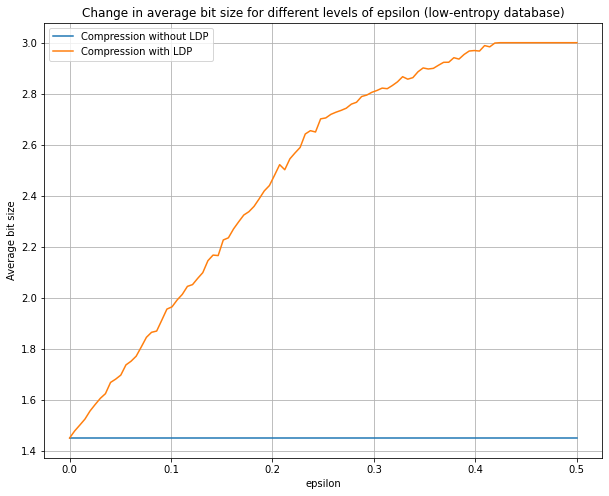

In [15]:
probabilities=[.8,.05,.05,.05,.05,0,0,0]
# Generate a database
db=imp.generateDB(10000, probabilities)
numBitsAvg,numBitsAvgLDP=CompressibilityLDP(db)
plt.figure(figsize=(10,8))
plt.title("Change in average bit size for different levels of epsilon (low-entropy database)")
plt.xlabel("epsilon")
plt.ylabel("Average bit size")
plt.grid(True)
plt.plot(epsilonLin,numBitsAvg,label="Compression without LDP")
plt.plot(epsilonLin,numBitsAvgLDP,label="Compression with LDP")
plt.legend()

## Rappor visualizations

In [2]:
numberRaw=list()
numberFake=list()
numberReport=list()
h=range(129)
k=128
f=0.25
p=0.5
q=0.75
arr=np.zeros(k)
for i in h:
    numberRaw.append(i)
    arr[:i]=1
    B_fake=rappor.FakeBloomFilter(arr,f)
    numberFake.append(B_fake.sum())
    report=rappor.RandomizedResponse(B_fake,q,p)
    numberReport.append(report.sum())

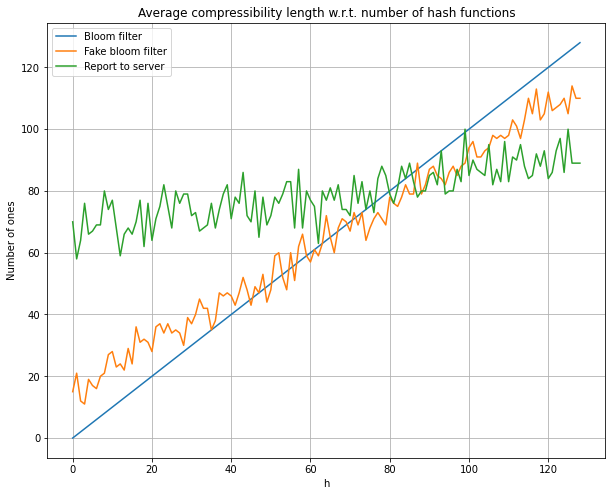

In [3]:
plt.figure(figsize=(10,8))
plt.title("Average compressibility length w.r.t. number of hash functions")
plt.xlabel("h")
plt.ylabel("Number of ones")
plt.grid(True)
plt.plot(h,numberRaw,label="Bloom filter")
plt.plot(h,numberFake,label="Fake bloom filter")
plt.plot(h,numberReport,label="Report to server")
plt.legend()

In [7]:
numberRaw=list()
numberFake=list()
numberReport=list()
h=5
k=128
f=np.linspace(0,1)
p=0.5
q=0.75
arr=np.zeros(k)
arr[:5]=1
for i in f:
    numberRaw.append(h)
    B_fake=rappor.FakeBloomFilter(arr,i)
    numberFake.append(B_fake.sum())
    report=rappor.RandomizedResponse(B_fake,q,p)
    numberReport.append(report.sum())

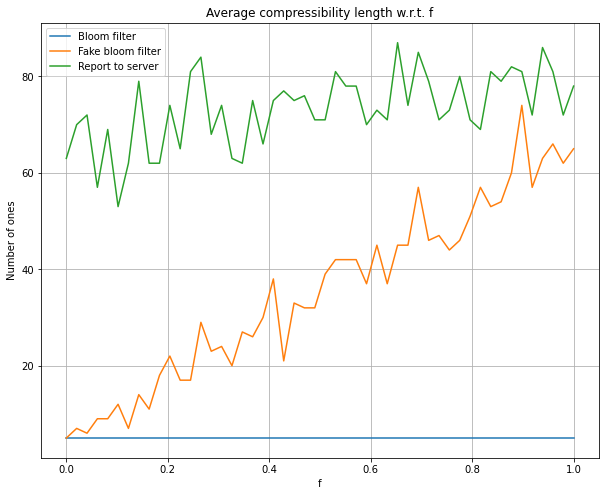

In [8]:
plt.figure(figsize=(10,8))
plt.title("Average compressibility length w.r.t. f")
plt.xlabel("f")
plt.ylabel("Number of ones")
plt.grid(True)
plt.plot(f,numberRaw,label="Bloom filter")
plt.plot(f,numberFake,label="Fake bloom filter")
plt.plot(f,numberReport,label="Report to server")
plt.legend()

In [9]:
numberRaw=list()
numberFake=list()
numberReport=list()
h=5
k=128
f=0.25
p=np.linspace(0,1)
q=0.75
arr=np.zeros(k)
arr[:5]=1
for i in p:
    numberRaw.append(h)
    B_fake=rappor.FakeBloomFilter(arr,f)
    numberFake.append(B_fake.sum())
    report=rappor.RandomizedResponse(B_fake,q,i)
    numberReport.append(report.sum())

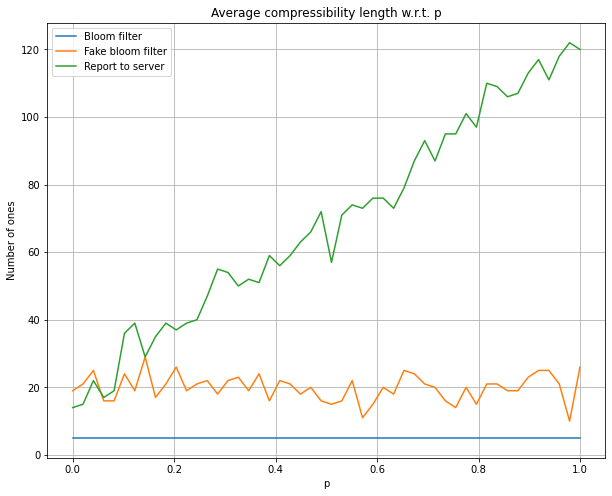

In [11]:
plt.figure(figsize=(10,8))
plt.title("Average compressibility length w.r.t. p")
plt.xlabel("p")
plt.ylabel("Number of ones")
plt.grid(True)
plt.plot(p,numberRaw,label="Bloom filter")
plt.plot(p,numberFake,label="Fake bloom filter")
plt.plot(p,numberReport,label="Report to server")
plt.legend()

In [12]:
numberRaw=list()
numberFake=list()
numberReport=list()
h=5
k=128
f=0.25
p=0.5
q=np.linspace(0,1)
arr=np.zeros(k)
arr[:5]=1
for i in q:
    numberRaw.append(h)
    B_fake=rappor.FakeBloomFilter(arr,f)
    numberFake.append(B_fake.sum())
    report=rappor.RandomizedResponse(B_fake,i,p)
    numberReport.append(report.sum())

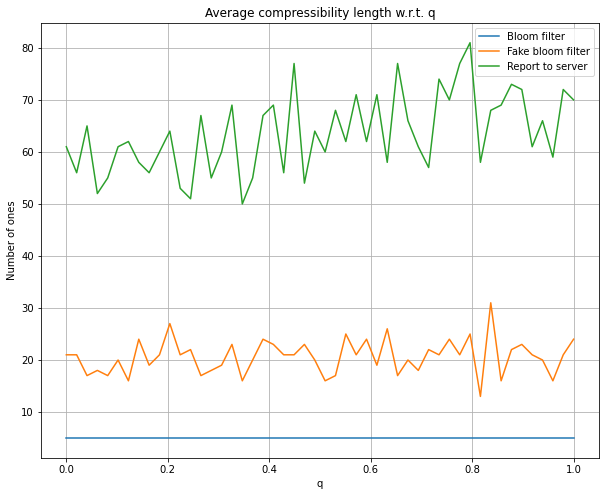

In [13]:
plt.figure(figsize=(10,8))
plt.title("Average compressibility length w.r.t. q")
plt.xlabel("q")
plt.ylabel("Number of ones")
plt.grid(True)
plt.plot(q,numberRaw,label="Bloom filter")
plt.plot(q,numberFake,label="Fake bloom filter")
plt.plot(q,numberReport,label="Report to server")
plt.legend()